In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "C:/Users/hasin/Desktop/"
CATEGORIES = ["tobyRes", "tobyNotRes"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

<Figure size 640x480 with 1 Axes>

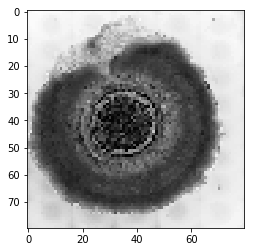

In [2]:
IMG_SIZE = 80

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [3]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            training_data.append([new_array, class_num])
            
create_training_data()

In [4]:
print(len(training_data))

248


In [5]:
import random

random.shuffle(training_data)

In [6]:
for sample in training_data:
    print(sample[1])

0
0
1
1
0
0
0
0
1
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
1
1
0
0
1
0
1
1
0
0
1
0
1
1
0
0
1
1
1
0
1
1
0
0
0
0
1
1
1
1
1
1
0
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
0
0
0
1
0
1
0
0
1
0
1
1
1
0
0
1
1
0
0
1
0
0
1
0
0
1
1
1
0
0
1
1
0
0
0
1
1
0
1
0
0
1
1
1
1
1
0
1
0
0
0
1
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
1
0
0
0
0
1
1
1
1
1
1
1
0
0
1
1
1
0
0
0
0
1
1
0
0
1
0
1
0
1
1
0
0
1
0
1
1
1
1
1
1
0
0
1
1
0
0
1
1
0
1
1
0
0
0
1
1
0
0
1
0
0
0
1
1
1
1
1
1
1
0
1
1
1
0
1
0
1
1
0
1
0
1
0
0
1
1
0
1
0
1
0
1
0
0
1
0
1
1


In [7]:
X = []
y = []

In [8]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [9]:
import pickle

pickle_out = open("X.pickle","wb")
with open("X.pickle", "wb") as f:
    pickle.dump(X, f)

#pickle.dump(XX, pickle_out)
    pickle_out.close()

pickle.out = open("y.pickle", "wb")
with open("y.pickle", "wb") as f:
    pickle.dump(y, f)

#pickle.dump(yy, pickle_out)
    pickle_out.close()

In [10]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [11]:
X[1]

array([[[133],
        [135],
        [137],
        ...,
        [128],
        [126],
        [124]],

       [[134],
        [136],
        [136],
        ...,
        [130],
        [127],
        [125]],

       [[134],
        [136],
        [136],
        ...,
        [131],
        [129],
        [126]],

       ...,

       [[124],
        [126],
        [127],
        ...,
        [133],
        [132],
        [131]],

       [[122],
        [125],
        [126],
        ...,
        [133],
        [133],
        [129]],

       [[121],
        [124],
        [126],
        ...,
        [132],
        [130],
        [129]]], dtype=uint8)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])


In [ ]:
model.fit(trainImages, trainLabels, batch_size = 50, epochs = 5, verbose = 1)
